# IMDB Movie Review Dataset

The IMDB Movie Review Dataset is one of the most popular datasets for sentiment analysis tasks, widely used in natural language processing (NLP) research and real-world applications. This dataset contains 50,000 movie reviews collected from the Internet Movie Database (IMDB), where each review is labeled as either positive or negative. It's a go-to resource for anyone looking to build, test, or improve sentiment analysis models.

## Balanced Dataset for Sentiment Analysis

One of the most important features of the IMDB dataset is its balance between positive and negative reviews. With 25,000 positive reviews and 25,000 negative reviews, the dataset ensures that no particular sentiment is over-represented, which is crucial for avoiding biased model training. This balance makes it an excellent tool for experimenting with different algorithms, as it provides a consistent benchmark for model evaluation.

## Data Structure

Columns:
review: The raw text of the movie review, which can vary in length from a few sentences to several paragraphs. This variability is useful for testing models on both short and long text inputs.
sentiment: A binary label that indicates whether the review is positive or negative. This serves as the target variable for classification tasks.

## Applications and Use Cases

The IMDB Movie Review Dataset is versatile and offers many practical applications:

Building Sentiment Analysis Models: The dataset is primarily used to build models that can classify movie reviews as either positive or negative. Machine learning techniques such as logistic regression, support vector machines (SVMs), or deep learning models like recurrent neural networks (RNNs) and transformers (e.g., BERT) can be trained and evaluated using this data.

Text Preprocessing and Feature Engineering: NLP tasks typically require various preprocessing steps like tokenization, stop-word removal, stemming, lemmatization, and vectorization (e.g., TF-IDF, Word2Vec). The IMDB dataset serves as a great foundation for experimenting with different preprocessing pipelines to determine how they affect model accuracy. Preprocessing can improve or hinder performance, and this dataset provides ample text for testing.

Exploratory Data Analysis (EDA): This dataset can also be used for understanding trends in audience sentiment towards certain movie genres, actors, directors, or periods. Researchers can analyze patterns such as common words in positive vs. negative reviews or how review length correlates with sentiment. This kind of insight can be valuable for improving movie recommendations or marketing strategies.

Transfer Learning and Fine-tuning: With the rise of pre-trained language models like BERT and GPT, the IMDB Movie Review Dataset is often used to fine-tune these models for specific sentiment analysis tasks. Transfer learning enables practitioners to leverage these models' deep understanding of language, improving performance on the IMDB dataset after a brief period of fine-tuning.

Model Comparison and Benchmarking: Due to its well-balanced nature, this dataset is often used for benchmarking machine learning models. It provides a consistent standard for comparing the accuracy and efficiency of different algorithms or architectures. For example, a comparison between traditional methods (like Naive Bayes or SVMs) and modern deep learning techniques can be made to see how model complexity affects performance.

## Challenges and Considerations

While the IMDB Movie Review Dataset is a powerful resource, it also presents some challenges:

Imbalanced Text Lengths: Reviews can range from just a few words to lengthy paragraphs. Short reviews may lack context, while longer reviews might introduce noise, requiring effective preprocessing.
Subjectivity and Ambiguity: Some reviews may be mixed or ambiguous in sentiment, even though the dataset labels them as strictly positive or negative. This can pose challenges for models, especially in identifying nuanced or sarcastic reviews.
Overfitting on Repetitive Words: Certain words (e.g., "great," "terrible") might appear frequently in positive or negative reviews. This can cause models to rely too heavily on these words, potentially overlooking the overall context of a review.
Broader Implications of Sentiment Analysis

Sentiment analysis using the IMDB dataset extends beyond just movie reviews. Many industries can leverage sentiment analysis for tasks like:

Customer Feedback Analysis: Businesses can monitor customer reviews and feedback in real-time to improve their products or services.
Social Media Monitoring: Sentiment analysis can be used to track public opinion on social media platforms, helping organizations respond to trends and crises more effectively.
Product Reviews: Online retailers can assess customer satisfaction by analyzing product reviews, improving their recommendation systems and marketing strategies.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_reviews_df = pd.read_csv('/home/studen/mlclass/IMDB Dataset.csv')

In [3]:
movie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
movie_reviews_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Visualisation

In [5]:
print(movie_reviews_df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


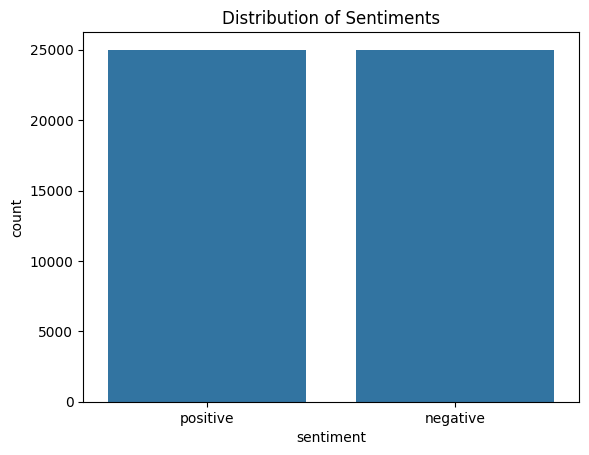

In [6]:
sns.countplot(data=movie_reviews_df, x='sentiment')
plt.title('Distribution of Sentiments')
plt.show()

The sns.countplot visualizes the distribution of sentiments in the IMDb Movie Reviews dataset, revealing an equal representation of positive and negative reviews, with each category containing 25,000 entries. This balanced distribution is depicted by two bars of identical height, indicating that neither sentiment is favored over the other. Such an equilibrium is beneficial for sentiment analysis, as it ensures that the machine learning model can learn effectively from a diverse set of examples, thereby reducing the risk of bias towards one sentiment and enhancing the model's ability to generalize to unseen data. The plot effectively conveys the dataset's suitability for training a robust sentiment analysis model.

## Removal of Named Entities

In [7]:
# After running the installation commands above, you can load the SpaCy model and use it
import spacy

# Load the SpaCy model for named entity recognition
nlp = spacy.load('en_core_web_sm')

def remove_named_entities(text):
    # Process the text with SpaCy
    doc = nlp(text)
    # Keep tokens that are not named entities
    tokens = [token.text for token in doc if not token.ent_type_]
    return ' '.join(tokens)

# Apply the named entity removal function to the dataframe
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_named_entities)

The provided code utilizes the SpaCy library for Natural Language Processing (NLP) to remove named entities from movie reviews in a DataFrame. First, it imports the SpaCy library and loads a small English language model (en_core_web_sm) designed for named entity recognition. The function remove_named_entities takes a string of text as input, processes it with the loaded model to create a doc object, and then generates a list of tokens that are not classified as named entities by checking the ent_type_ attribute of each token. Finally, the function joins these non-entity tokens back into a single string and returns it. The code applies this function to each review in the movie_reviews_df DataFrame using the apply method, effectively updating the 'review' column by replacing the original text with the modified text that excludes named entities.

As the output above shows the method above did not remove all the named entities.

In [8]:
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: of the other reviewers has mentioned that after watching just Oz episode you 'll be hooked . They are right , as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence , which set in right from the word . Trust me , this is not a show for the faint hearted or timid . This show pulls no punches with regards to drugs , sex or violence . Its is hardcore , in the classic use of the word.<br /><br />It is called as that is the nickname given to . It focuses mainly on , an experimental section of the prison where all the cells have glass fronts and face inwards , so privacy is not high on the agenda . is home to many .. , , gangstas , , , , and more .... so scuffles , death stares , dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows would n't dare . Forget pretty pictures painted for mainstr

In [9]:
import re

def remove_proper_nouns(text):
    return re.sub(r'\b[A-Z][a-z]+\b', '', text)

movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_proper_nouns)


This approach removes proper nouns from text, which can be useful for anonymizing text data or simplifying text for analysis by eliminating names of people, places, or organizations. However, it may remove useful words (e.g., city names) and miss names that don't follow the capital-letter rule (e.g., "iPhone"). It caters for the names that were provided by the doc that was created by spacy and then skipped.

In [10]:
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: of the other reviewers has mentioned that after watching just  episode you 'll be hooked .  are right , as this is exactly what happened with me.<br /><br /> first thing that struck me about  was its brutality and unflinching scenes of violence , which set in right from the word .  me , this is not a show for the faint hearted or timid .  show pulls no punches with regards to drugs , sex or violence .  is hardcore , in the classic use of the word.<br /><br /> is called as that is the nickname given to .  focuses mainly on , an experimental section of the prison where all the cells have glass fronts and face inwards , so privacy is not high on the agenda . is home to many .. , , gangstas , , , , and more .... so scuffles , death stares , dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows would n't dare .  pretty pictures painted for mainstream audiences , forget charm , fo

## Conversion of text to Lowercase 

In [11]:
# Convert the 'review' column to lowercase
movie_reviews_df['review'] = movie_reviews_df['review'].str.lower()


## Removing stop words

In [12]:
custom_stop_words = [
    # Pronouns
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 's',

    # Auxiliary verbs and other common verbs
    'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
    'doing', 'can', 'could', 'should', 'would', 'might', 'may', 'must', 'shall', 'will', 'won', "won't", 'don', 
    "don't", 'didn', "didn't", 'doesn', "doesn't", 'isn', "isn't", 'aren', "aren't", 'hasn', "hasn't", 'haven', 
    "haven't", 'wasn', "wasn't", 'weren', "weren't", 'needn', "needn't", 'shan', "shan't", 'wouldn', "wouldn't", 
    'mustn', "mustn't", 'mightn', "mightn't", 'couldn', "couldn't", 'shouldn', "shouldn't", 'd', 'll', 'm', 'o', 
    're', 've', 'y', 'ain', 'ma',

    # Common prepositions and conjunctions
    'and', 'but', 'or', 'nor', 'for', 'so', 'yet', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',

    # Articles and determiners
    'a', 'an', 'the', 'all', 'any', 'both', 'each', 'every', 'few', 'more', 'most', 'some', 'such', 'no', 'nor', 
    'only', 'own', 'same', 'so', 'too', 'very',

    # Filler words and expressions
    'lot', 'lots', 'thing', 'things', 'stuff', 'something', 'anything', 'nothing', 'everything', 'bit', 'big', 
    'small', 'whole', 'half', 'kind of', 'sort of', 'basically', 'literally', 'seriously', 'actually', 'definitely', 
    'honestly', 'obviously', 'clearly', 'essentially', 'really', 'anyway', 'anyhow', 'etc','part', 'main', 'another',

    # Movie-specific words (excluding emotive words)
    'movie', 'film', 'scene', 'plot', 'story', 'character', 'cast', 'actor', 'actress', 'role', 'director', 
    'watch', 'watched', 'watching', 'see', 'seen', 'seeing', 'end', 'ends', 'ending', 'start', 'starts', 
    'starting', 'begin', 'begins', 'beginning', 'series', 'show',

    # Common phrases that don't add meaning
    'in my opinion', 'i think that', 'as far as', 'as long as', 'as soon as', 'in conclusion', 'in summary', 
    'on the other hand', 'on one hand', 'all in all', 'overall', 'basically', 'simply', 'actually', 'literally', 
    'definitely', 'certainly', 'without a doubt',

    # Common movie-related time references
    'hour', 'hours', 'minute', 'minutes', 'second', 'seconds', 'long', 'short', 'longer', 'shorter', 'halfway', 
    'beginning', 'middle', 'end', 'ending', 'first half', 'second half', 'part', 'chapter', 'scene', 
    'before', 'after', 'during', 'while',

    # Vague expressions about the movie
    'a lot', 'a bit', 'so much', 'too much', 'too little', 'plenty', 'enough', 'few', 'many', 'several', 
    'bunch', 'couple', 'dozens', 'hundreds', 'thousands', 'millions', 'half', 'quarter',

    # Any additional non-sentiment specific words can be added here
]

def remove_custom_stopwords(text):
    # Tokenize the text (split into words)
    tokens = text.split()
    # Keep tokens that are not in the custom stop words list
    tokens = [word for word in tokens if word.lower() not in custom_stop_words]
    # Return the filtered text
    return ' '.join(tokens)

# Apply the stop word removal function to the 'review' column
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_custom_stopwords)

This part defines a function to remove custom stop words from text data in containing movie reviews. Stop words are commonly used words in a language that are often filtered out in natural language processing tasks because they carry less meaningful information.



In [13]:
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: other reviewers mentioned just episode 'll hooked . right , exactly happened me.<br /><br /> first struck brutality unflinching scenes violence , set right word . , not faint hearted timid . pulls punches regards drugs , sex violence . hardcore , classic use word.<br /><br /> called nickname given . focuses mainly , experimental section prison where cells glass fronts face inwards , privacy not high agenda . home .. , , gangstas , , , , .... scuffles , death stares , dodgy dealings shady agreements never far away.<br /><br />i say appeal due fact goes where other shows n't dare . pretty pictures painted mainstream audiences , forget charm , forget romance ... oz n't mess around . episode ever saw struck nasty surreal , n't say ready , , developed taste , got accustomed high levels graphic violence . just violence , injustice ( crooked guards 'll sold nickel , inmates 'll kill order get away , well mannered , class inmates turned prison bitches due lack street skills prison ex

provides a glimpse of the processed movie reviews, allowing for an easy assessment of the data and the effectiveness of removing stop words that had been applied.

## Removing filler words

In [14]:
import spacy

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define the custom list of filler words
filler_words = set([
    'like', 'uh', 'um', 'ummm', 'hehehe', 'hahaha', 'you know', 'i mean', 'actually', 'literally', 
    'kinda', 'sort of', 'just', 'okay', 'so', 'well', 'right', 'anyway', 'uhm', 'erm', 'totally', 
    'seriously', 'honestly', 'pretty much', 'maybe', 'perhaps', 'really', 'sorta', 'yeah', 'yup', 
    'nope', 'oh', 'ah', 'alright', 'yknow', 'gotcha', 'look', 'obviously', 'clearly', 'apparently', 
    'definitely', 'absolutely', 'quite', 'nearly', 'only', 'sure', 'stuff', 'things', 'whatever', 
    'whenever', 'whoever', 'wherever', 'whatchamacallit', 'whatcha', 'yada', 'ok', 'kind of', 'anyhow', 
    'somewhat', 'around', 'etc', 'and so on', 'and so forth', 'seriously', 'totally', 'thus', 
    'therefore', 'at the end of the day', 'to be honest', 'believe me', 'by the way', 'furthermore', 
    'in fact', 'in my opinion', 'like I said', 'in a nutshell', 'in short', 'basically', 'on the other hand', 
    'as a matter of fact', 'incidentally', 'kindof', 'for sure', 'it was', 'sorta', 'kinda', 'and all','though',
    'certainly','instead', 'especially','mostly','although','particularly','either','back','many', 'truly',
    'given','mainly',
])

# Function to remove filler words based on the custom list
def remove_filler_words(text):
    # Process the text using SpaCy
    doc = nlp(text)
    # Keep tokens that are not in the filler words list
    tokens = [token.text for token in doc if token.text.lower() not in filler_words]
    return ' '.join(tokens)

# Apply the filler word removal function based on the custom filler words list
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_filler_words)

This code snippet utilizes the SpaCy library to process movie reviews and remove specified filler words from the text.A set of customized filler words is used so as to capture all the words in our dataset. Filler words often do not add significant meaning to a sentence and can clutter the overall message.



In [15]:
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: other reviewers mentioned episode 'll hooked . , exactly happened me.<br /><br / > first struck brutality unflinching scenes violence , set word . , not faint hearted timid . pulls punches regards drugs , sex violence . hardcore , classic use word.<br /><br / > called nickname . focuses , experimental section prison where cells glass fronts face inwards , privacy not high agenda . home .. , , gangstas , , , , .... scuffles , death stares , dodgy dealings shady agreements never far away.<br /><br />i say appeal due fact goes where other shows n't dare . pretty pictures painted mainstream audiences , forget charm , forget romance ... oz n't mess . episode ever saw struck nasty surreal , n't say ready , , developed taste , got accustomed high levels graphic violence . violence , injustice ( crooked guards 'll sold nickel , inmates 'll kill order get away , mannered , class inmates turned prison bitches due lack street skills prison experience ) , become comfortable uncomfortable

Displaying the first three lines in the review column to show the effectiveness of the removed filler words


## Removing HTML Tags

In [16]:
import re

def remove_html_tags(text):
    # Use regex to remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_html_tags)

This line of code defines a function called `remove_html_tags`, which uses a regular expression (regex) to remove HTML tags from a given text string. The regex pattern `<.*?>` matches any sequence of characters that starts with a `<`, ends with a `>`, and includes any characters in between, effectively capturing and removing all HTML tags from the text. The `remove_html_tags` function takes a text input, applies the regex substitution to replace the matched HTML tags with an empty string (thereby removing them), and then returns the cleaned text. The code then applies this function to the `review` column of the `movie_reviews_df` DataFrame, ensuring that any HTML tags present in the reviews are stripped away, leaving only the plain text content.

## Removing Panctuation Marks

In [17]:
import string
def remove_punctuation(text):
    # Remove punctuation using str.translate and string.punctuation
    return text.translate(str.maketrans('', '', string.punctuation))
# Apply the punctuation removal function to the 'review' column
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_punctuation)

The code imports the string module and defines the remove_punctuation function, which removes punctuation from the input text. It utilizes the str.translate method along with string.punctuation, a predefined string containing all punctuation characters. The str.maketrans function creates a translation table that maps each punctuation character to None, effectively removing them from the text. The remove_punctuation function is then applied to the 'review' column of the movie_reviews_df DataFrame, updating the reviews by stripping away any punctuation marks, resulting in cleaner text for further analysis.

In [18]:
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: other reviewers mentioned episode ll hooked   exactly happened me first struck brutality unflinching scenes violence  set word   not faint hearted timid  pulls punches regards drugs  sex violence  hardcore  classic use word called nickname  focuses  experimental section prison where cells glass fronts face inwards  privacy not high agenda  home    gangstas      scuffles  death stares  dodgy dealings shady agreements never far awayi say appeal due fact goes where other shows nt dare  pretty pictures painted mainstream audiences  forget charm  forget romance  oz nt mess  episode ever saw struck nasty surreal  nt say ready   developed taste  got accustomed high levels graphic violence  violence  injustice  crooked guards ll sold nickel  inmates ll kill order get away  mannered  class inmates turned prison bitches due lack street skills prison experience   become comfortable uncomfortable viewing  that s if get touch darker side 
Review 2: wonderful little production   filming te

This code is for displaying the effectiveness of the removed HTML tags and panctuation marks

## Removing Numbers and Measurements

In [19]:
import re

# List of common ordinal, cardinal, and other numerical words
numerical_words = [
    # Ordinals
    "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth",
    "eleventh", "twelfth", "thirteenth", "fourteenth", "fifteenth", "sixteenth", "seventeenth", "eighteenth", "nineteenth", "twentieth",
    # Cardinals
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
    "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty",
    "hundred", "thousand", "million", "billion",
    # Fractions
    "half", "quarter", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth",
    # Miscellaneous
    "dozen", "couple", "pair",
    # Roman Numerals
    "i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"
]

def remove_numbers_and_measurements(text):
    # Remove numbers and measurements (like "100kg", "5m", etc.)
    text = re.sub(r'\b\d+\w*\b', '', text)
    
    # Remove common numerical words (ordinals, cardinals, fractions, etc.)
    text = ' '.join([word for word in text.split() if word.lower() not in numerical_words])
    
    return text

# Apply the function to remove numbers, measurements, and all specified numerical words
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_numbers_and_measurements)
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: other reviewers mentioned episode ll hooked exactly happened me struck brutality unflinching scenes violence set word not faint hearted timid pulls punches regards drugs sex violence hardcore classic use word called nickname focuses experimental section prison where cells glass fronts face inwards privacy not high agenda home gangstas scuffles death stares dodgy dealings shady agreements never far awayi say appeal due fact goes where other shows nt dare pretty pictures painted mainstream audiences forget charm forget romance oz nt mess episode ever saw struck nasty surreal nt say ready developed taste got accustomed high levels graphic violence violence injustice crooked guards ll sold nickel inmates ll kill order get away mannered class inmates turned prison bitches due lack street skills prison experience become comfortable uncomfortable viewing that s if get touch darker side
Review 2: wonderful little production filming technique unassuming old time fashion gives comforti

This code imports the re module and defines the remove_numbers_and_measurements function, which is designed to eliminate numbers and measurements from a given text. The function uses a regular expression (regex) pattern \b\d+\w*\b to identify sequences of digits (representing numbers) that may be optionally followed by letters (representing units, such as "kg" or "m"). The re.sub method replaces these matches with an empty string, effectively removing them from the text. The function is then applied to the 'review' column of the movie_reviews_df DataFrame, cleaning the reviews by stripping out any numerical values and measurements, which helps to focus on the qualitative aspects of the text.

In [20]:
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: other reviewers mentioned episode ll hooked exactly happened me struck brutality unflinching scenes violence set word not faint hearted timid pulls punches regards drugs sex violence hardcore classic use word called nickname focuses experimental section prison where cells glass fronts face inwards privacy not high agenda home gangstas scuffles death stares dodgy dealings shady agreements never far awayi say appeal due fact goes where other shows nt dare pretty pictures painted mainstream audiences forget charm forget romance oz nt mess episode ever saw struck nasty surreal nt say ready developed taste got accustomed high levels graphic violence violence injustice crooked guards ll sold nickel inmates ll kill order get away mannered class inmates turned prison bitches due lack street skills prison experience become comfortable uncomfortable viewing that s if get touch darker side
Review 2: wonderful little production filming technique unassuming old time fashion gives comforti

## Removal of Hashtags, URLS and Emojis

In [21]:
import re

# Function to remove URLs from text
def remove_urls(text):
    # Regex pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Substitute URLs with an empty string
    return url_pattern.sub(r'', text)

# Example usage on a review column
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_urls)


The  code defines a function, remove_urls, that effectively removes URLs from a given text string. By utilizing a regular expression pattern, the function identifies and eliminates any URLs starting with "http", "https", or "www" from the input text. This is particularly useful for preprocessing text data, such as movie reviews, where URLs may not contribute to the analysis and could introduce noise. The function is applied to the review column of a DataFrame named movie_reviews_df, ensuring that each review is cleaned of any URLs, resulting in a more focused and relevant dataset for further text analysis or modeling tasks.

In [22]:
import re

# Function to remove hashtags from text
def remove_hashtags(text):
    # Regex pattern to match hashtags
    hashtag_pattern = re.compile(r'#\w+')
    # Substitute hashtags with an empty string
    return hashtag_pattern.sub(r'', text)

# Example usage on a review column
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_hashtags)


The  code defines a function called remove_hashtags designed to remove hashtags from a given text string. Using a regular expression pattern, the function identifies hashtags, which are defined as any word that follows the "#" symbol. By substituting these hashtags with an empty string, the function cleans the input text by removing all instances of hashtags. This process is particularly useful for preprocessing text data, such as movie reviews, where hashtags may not provide meaningful information for analysis. The function is applied to the review column of a DataFrame named movie_reviews_df, ensuring that each review is stripped of any hashtags, resulting in a cleaner and more relevant dataset for further text analysis or modeling tasks.

In [23]:
import emoji

# Function to remove emojis from text using the emoji library
def remove_emojis(text):
    # Use the emoji library to remove all emojis from the text
    return emoji.replace_emoji(text, replace='')

# Example usage on a review column
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_emojis)

The provided code snippet defines a function called remove_emojis, which utilizes the emoji library to remove emojis from a given text string. The function employs the replace_emoji method from the library, replacing any detected emojis in the input text with an empty string. This functionality is particularly beneficial for preprocessing text data, such as movie reviews, where emojis may not contribute to the analytical value of the text. By applying this function to the review column of the movie_reviews_df DataFrame, each review is cleansed of emojis, resulting in a more focused and relevant dataset for subsequent text analysis or modeling tasks.

In [24]:
# Print 10 sentences from the 'review' column after processing
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: other reviewers mentioned episode ll hooked exactly happened me struck brutality unflinching scenes violence set word not faint hearted timid pulls punches regards drugs sex violence hardcore classic use word called nickname focuses experimental section prison where cells glass fronts face inwards privacy not high agenda home gangstas scuffles death stares dodgy dealings shady agreements never far awayi say appeal due fact goes where other shows nt dare pretty pictures painted mainstream audiences forget charm forget romance oz nt mess episode ever saw struck nasty surreal nt say ready developed taste got accustomed high levels graphic violence violence injustice crooked guards ll sold nickel inmates ll kill order get away mannered class inmates turned prison bitches due lack street skills prison experience become comfortable uncomfortable viewing that s if get touch darker side
Review 2: wonderful little production filming technique unassuming old time fashion gives comforti

The provided code snippet is a simple loop that prints the first three reviews from the review column of the movie_reviews_df DataFrame after processing (removal of URLs, hashtags, emojis, or any other preprocessing steps you've applied to the reviews).

## Removing Non-Dictionary Words from Movie Reviews

In [25]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /home/studen/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [27]:
from nltk.corpus import words

# Get the list of valid English words
english_words = set(words.words())

# Function to remove words not found in the English dictionary
def remove_non_dictionary_words(text):
    tokens = text.split()  # Tokenize the text
    valid_words = [word for word in tokens if word.lower() in english_words]  # Keep only dictionary words
    return ' '.join(valid_words)

# Apply the function to your reviews
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_non_dictionary_words)

# Print 10 sample reviews to verify
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: other episode hooked exactly me struck brutality unflinching violence set word not faint hearted timid sex violence classic use word nickname experimental section prison where glass face inwards privacy not high agenda home death dodgy shady never far say appeal due fact goes where other dare pretty painted forget charm forget romance mess episode ever saw struck nasty say ready taste got accustomed high graphic violence violence injustice crooked sold nickel kill order get away mannered class turned prison due lack street prison experience become comfortable uncomfortable that s if get touch side
Review 2: wonderful little production technique unassuming old time fashion comforting sometimes discomforting sense realism entire piece extremely chosen not got pat seamless diary not worth terrificly written piece masterful production great master s comedy life realism comes home little fantasy guard rather than use traditional dream remains solid knowledge concerning flat s surf

This code snippet is particularly useful for preprocessing text data in natural language processing (NLP) tasks. By removing words that are not part of the English dictionary, it helps in cleaning the data for further analysis or modeling, ensuring that only meaningful and valid words are retained in the reviews. The verification step allows for a quick inspection of the processed data to ensure that the filtering was successful.

In [28]:
import nltk
from nltk.corpus import words

# Download the 'words' corpus if not already downloaded
nltk.download('words')

# Get the list of valid English words
english_words = set(words.words())

# Function to remove non-dictionary words and short words (1, 2, or 3 letters)
def remove_non_dictionary_and_short_words(text):
    tokens = text.split()  # Tokenize the text
    valid_words = [
        word for word in tokens 
        if len(word) > 3 and word.lower() in english_words
    ]
    return ' '.join(valid_words)

# Apply the function to your reviews
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_non_dictionary_and_short_words)

# Print 10 sample reviews to verify
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

[nltk_data] Downloading package words to /home/studen/nltk_data...
[nltk_data]   Package words is already up-to-date!


Review 1: other episode hooked exactly struck brutality unflinching violence word faint hearted timid violence classic word nickname experimental section prison where glass face inwards privacy high agenda home death dodgy shady never appeal fact goes where other dare pretty painted forget charm forget romance mess episode ever struck nasty ready taste accustomed high graphic violence violence injustice crooked sold nickel kill order away mannered class turned prison lack street prison experience become comfortable uncomfortable that touch side
Review 2: wonderful little production technique unassuming time fashion comforting sometimes discomforting sense realism entire piece extremely chosen seamless diary worth terrificly written piece masterful production great master comedy life realism comes home little fantasy guard rather than traditional dream remains solid knowledge concerning flat surface terribly done
Review 3: thought wonderful spend time sitting conditioned theater light h

This code is designed to clean movie reviews for natural language processing tasks by removing irrelevant or non-meaningful words. By eliminating short words and ensuring that only valid English words longer than three letters are retained, it enhances the quality of the text data. The final verification step allows for a quick inspection of the processed reviews, ensuring the filtering was executed correctly and that the remaining content is meaningful for subsequent analysis or modeling.

In [29]:
import nltk
from nltk.corpus import words
from nltk import pos_tag, word_tokenize

# Set the NLTK data path if necessary
nltk.data.path.append('/home/studen/nltk_data')  # Update the path if necessary

# Download the required NLTK resources if not already downloaded
try:
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('words')
except Exception as e:
    print("Error downloading NLTK resources:", e)

# Get the list of valid English words
try:
    english_words = set(words.words())
except LookupError as e:
    print("Error loading words:", e)

# Function to remove non-descriptive words
def remove_non_descriptive_words(text):
    # Tokenize the text and get the POS tags
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Keep only descriptive words (adjectives, adverbs, and relevant nouns)
    descriptive_words = [
        word for word, tag in pos_tags 
        if (tag.startswith('JJ') or tag.startswith('RB') or tag.startswith('NN')) 
        and word.lower() in english_words
    ]
    
    return ' '.join(descriptive_words)

# Apply the function to your reviews
try:
    movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_non_descriptive_words)
except Exception as e:
    print("Error applying the function to the DataFrame:", e)

# Print 10 sample reviews to verify
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Error applying the function to the DataFrame: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/home/studen/nltk_data'
    - '/home/studen/jupyter/mlclass/nltk_data'
    - '/home/studen/jupyter/mlclass/share/nltk_data'
    - '/home/studen/jupyter/mlclass/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/home/studen/nltk_data'
**********************************************************************

Review 1: other episode hooked exactly struck brutality unflinching violence word faint hearted timid violence classic word nickname experimental section prison where glass face inwards privacy high agen

[nltk_data] Downloading package punkt to /home/studen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/studen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /home/studen/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Removing Whitespace
## Tokenization

In [30]:
import re

def remove_whitespace_and_tokenize(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize by splitting the text into words
    tokens = text.split()
    return tokens

# Apply the function to remove whitespace and tokenize
movie_reviews_df['review'] = movie_reviews_df['review'].apply(remove_whitespace_and_tokenize)

This code snippet imports the re module and defines the remove_whitespace_and_tokenize function, which aims to clean and tokenize text. Inside the function, the first step is to remove extra whitespace by using the regular expression r'\s+', which matches one or more whitespace characters. The re.sub method replaces these matches with a single space, and the strip() method removes any leading or trailing spaces. After this cleanup, the function tokenizes the cleaned text by splitting it into individual words using the split() method, which defaults to splitting on whitespace. The result is a list of tokens (words), which is then returned. Finally, the function is applied to the 'review' column of the movie_reviews_df DataFrame, transforming each review into a list of words, making further text processing and analysis easier.

In [31]:
# Print 10 sentences from the 'review' column after processing
for i, review in enumerate(movie_reviews_df['review'].head(3)):
    print(f"Review {i + 1}: {review}")

Review 1: ['other', 'episode', 'hooked', 'exactly', 'struck', 'brutality', 'unflinching', 'violence', 'word', 'faint', 'hearted', 'timid', 'violence', 'classic', 'word', 'nickname', 'experimental', 'section', 'prison', 'where', 'glass', 'face', 'inwards', 'privacy', 'high', 'agenda', 'home', 'death', 'dodgy', 'shady', 'never', 'appeal', 'fact', 'goes', 'where', 'other', 'dare', 'pretty', 'painted', 'forget', 'charm', 'forget', 'romance', 'mess', 'episode', 'ever', 'struck', 'nasty', 'ready', 'taste', 'accustomed', 'high', 'graphic', 'violence', 'violence', 'injustice', 'crooked', 'sold', 'nickel', 'kill', 'order', 'away', 'mannered', 'class', 'turned', 'prison', 'lack', 'street', 'prison', 'experience', 'become', 'comfortable', 'uncomfortable', 'that', 'touch', 'side']
Review 2: ['wonderful', 'little', 'production', 'technique', 'unassuming', 'time', 'fashion', 'comforting', 'sometimes', 'discomforting', 'sense', 'realism', 'entire', 'piece', 'extremely', 'chosen', 'seamless', 'diary',

## Conversion of Important text into Numerical Format

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokenized words back into a single string for each review
movie_reviews_df['review'] = movie_reviews_df['review'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the review text data
tfidf_matrix = tfidf_vectorizer.fit_transform(movie_reviews_df['review'])

# Print the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Convert the TF-IDF scores to a DataFrame for easy manipulation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

TF-IDF matrix shape: (50000, 5000)
   abandon  abandoned  ability  able  aboard  abomination  abortion  abound  \
0      0.0        0.0      0.0   0.0     0.0          0.0       0.0     0.0   
1      0.0        0.0      0.0   0.0     0.0          0.0       0.0     0.0   
2      0.0        0.0      0.0   0.0     0.0          0.0       0.0     0.0   
3      0.0        0.0      0.0   0.0     0.0          0.0       0.0     0.0   
4      0.0        0.0      0.0   0.0     0.0          0.0       0.0     0.0   

   abroad  abrupt  ...  yelling  yellow     young  younger  youth  youthful  \
0     0.0     0.0  ...      0.0     0.0  0.000000      0.0    0.0       0.0   
1     0.0     0.0  ...      0.0     0.0  0.000000      0.0    0.0       0.0   
2     0.0     0.0  ...      0.0     0.0  0.101865      0.0    0.0       0.0   
3     0.0     0.0  ...      0.0     0.0  0.000000      0.0    0.0       0.0   
4     0.0     0.0  ...      0.0     0.0  0.000000      0.0    0.0       0.0   

   zany    zomb

This code snippet uses the `TfidfVectorizer` from the `sklearn` library to transform a collection of movie review texts into a numerical representation called a TF-IDF matrix, which quantifies the importance of each word in relation to the entire dataset. The `TfidfVectorizer` is initialized with options to exclude English stop words and limit the maximum number of features to 5,000, which helps reduce memory usage. The `fit_transform` method is then called on the `review` column of the `movie_reviews_df` DataFrame to generate the TF-IDF matrix, representing each review as a sparse matrix of TF-IDF scores. The code then prints the shape of the TF-IDF matrix, allows inspection of a specific review's TF-IDF vector, and shows how to convert small chunks of the matrix to a dense format for visualization. Finally, it assigns the TF-IDF scores to a new column in the DataFrame, allowing for further analysis or processing of the review data.

The output shows that the TF-IDF matrix has 50,000 movie reviews and 5,000 different words after processing the text. Each review is represented as a list of numbers, where only a few numbers are important. 

## Word Cloud

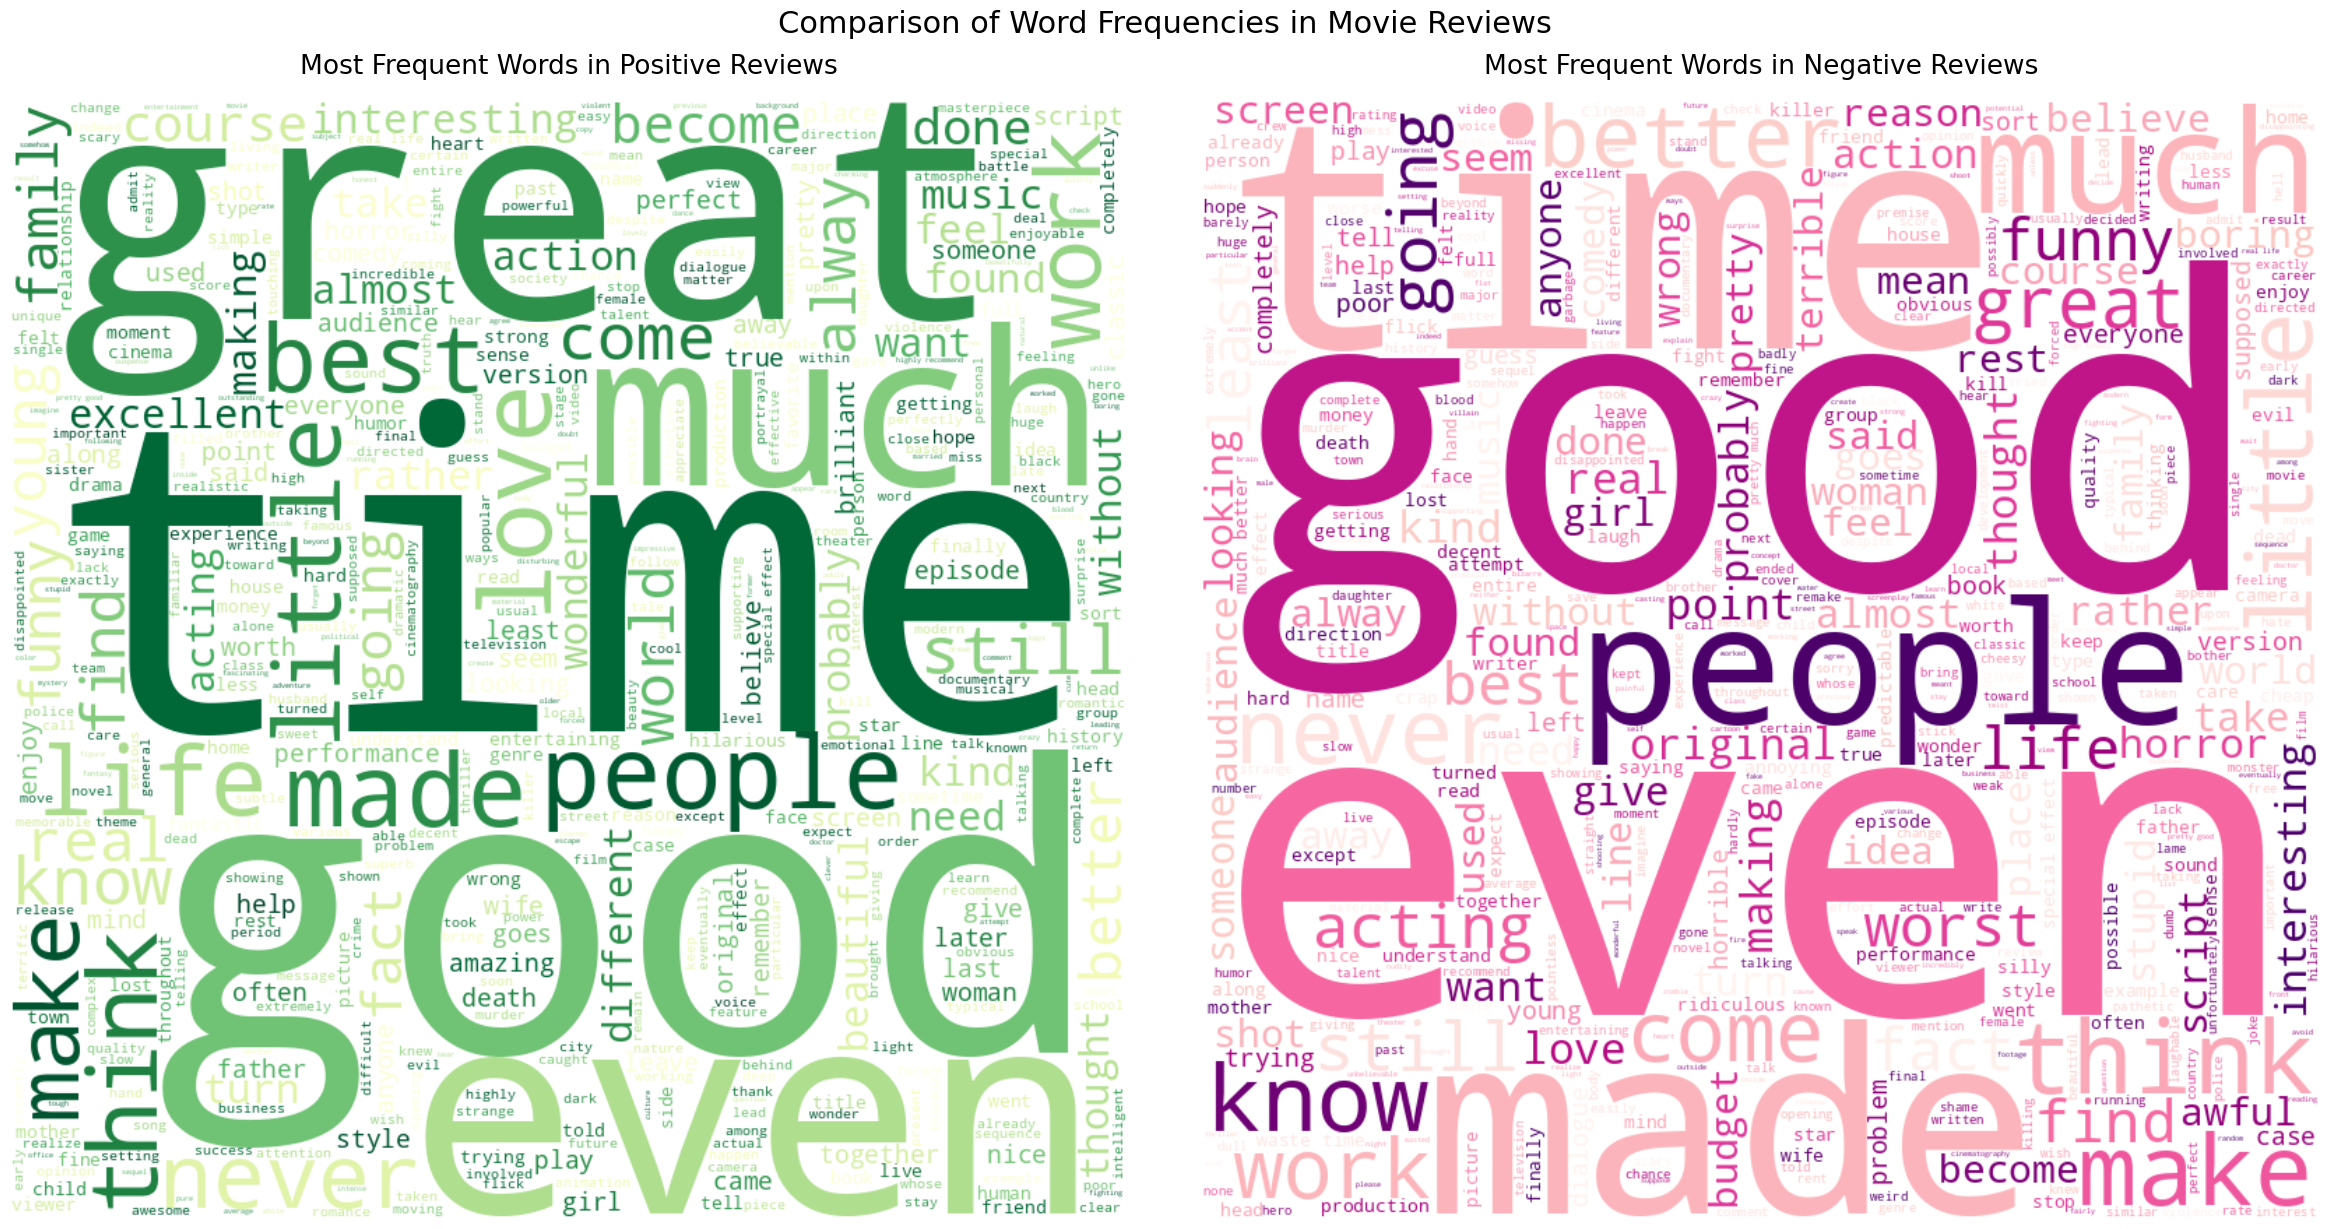

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_comparison_wordcloud(df):
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12), facecolor='None')

    # Process positive reviews
    positive_reviews = df[df['sentiment'] == 'positive']['review']
    positive_text = ' '.join([word for word in positive_reviews])

    # Process negative reviews
    negative_reviews = df[df['sentiment'] == 'negative']['review']
    negative_text = ' '.join([word for word in negative_reviews])

    # Generate word cloud for positive reviews
    wordcloud_positive = WordCloud(
        max_words=500,
        width=800,
        height=800,
        background_color='white',
        colormap='YlGn'  # Yellow-Green colormap for positive sentiment
    ).generate(positive_text)

    # Generate word cloud for negative reviews
    wordcloud_negative = WordCloud(
        max_words=500,
        width=800,
        height=800,
        background_color='white',
        colormap='RdPu'  # Red-Purple colormap for negative sentiment
    ).generate(negative_text)

    # Plot positive reviews
    ax1.imshow(wordcloud_positive, interpolation='bilinear')
    ax1.axis('off')
    ax1.set_title('Most Frequent Words in Positive Reviews', fontsize=19, pad=20)

    # Plot negative reviews
    ax2.imshow(wordcloud_negative, interpolation='bilinear')
    ax2.axis('off')
    ax2.set_title('Most Frequent Words in Negative Reviews', fontsize=19, pad=20)

    # Add main title
    plt.suptitle('Comparison of Word Frequencies in Movie Reviews', fontsize=22, y=1.02)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    return fig


fig = create_comparison_wordcloud(movie_reviews_df)
plt.show()

A word cloud is an effective visual tool that summarizes the key themes and sentiments within a set of text data, such as movie reviews. By representing words in varying sizes based on their frequency, it allows viewers to quickly identify which terms are most prevalent and significant. This can highlight consumer sentiment, common topics of discussion, and overall trends in the reviews, making it easier for stakeholders, such as filmmakers or marketers, to grasp the audience's perceptions at a glance. In an analysis context, word clouds provide an engaging way to present text data insights, complementing more traditional statistical methods by offering an intuitive visual representation that can spark further inquiry or exploration into the underlying themes.

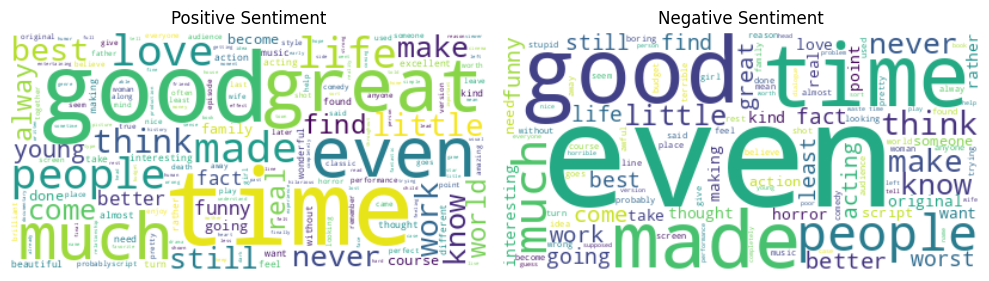

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming movie_reviews_df has a 'sentiment' column with 'positive' or 'negative' values

# Combine all positive and negative reviews into separate texts
positive_reviews = ' '.join(movie_reviews_df[movie_reviews_df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(movie_reviews_df[movie_reviews_df['sentiment'] == 'negative']['review'])

# Create a set of stop words
stopwords = set(STOPWORDS)

# Create word clouds for both sentiments, including stop words removal
wordcloud_positive = WordCloud(width=400, height=200, background_color='white', stopwords=stopwords).generate(positive_reviews)
wordcloud_negative = WordCloud(width=400, height=200, background_color='white', stopwords=stopwords).generate(negative_reviews)

# Display the word clouds side by side
plt.figure(figsize=(10, 5))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment')

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


## Bag Of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Fit and transform the review text data
count_matrix = count_vectorizer.fit_transform(movie_reviews_df['review'])

# Print the shape of the Count matrix
print(f"Count matrix shape: {count_matrix.shape}")

# Convert to a DataFrame for easier visualization
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
print(count_df.head())

Count matrix shape: (50000, 5000)
   abandon  abandoned  ability  able  aboard  abomination  abortion  abound  \
0        0          0        0     0       0            0         0       0   
1        0          0        0     0       0            0         0       0   
2        0          0        0     0       0            0         0       0   
3        0          0        0     0       0            0         0       0   
4        0          0        0     0       0            0         0       0   

   abroad  abrupt  ...  yelling  yellow  young  younger  youth  youthful  \
0       0       0  ...        0       0      0        0      0         0   
1       0       0  ...        0       0      0        0      0         0   
2       0       0  ...        0       0      1        0      0         0   
3       0       0  ...        0       0      0        0      0         0   
4       0       0  ...        0       0      0        0      0         0   

   zany  zombie  zone  zoom  
0   

This code snippet utilizes the CountVectorizer from the sklearn library to convert a collection of movie reviews into a numerical format suitable for analysis. It initializes the vectorizer with English stop words and limits the features to a maximum of 5,000 words. The fit_transform method processes the reviews from the movie_reviews_df DataFrame, creating a sparse matrix where each row represents a review and each column corresponds to a unique word, with values indicating the frequency of those words in each review. The shape of this count matrix is printed to show the dimensions, and the matrix is then converted to a Pandas DataFrame for easier visualization, displaying the first few rows to provide an overview of the transformed data.

## Review Visualisation 

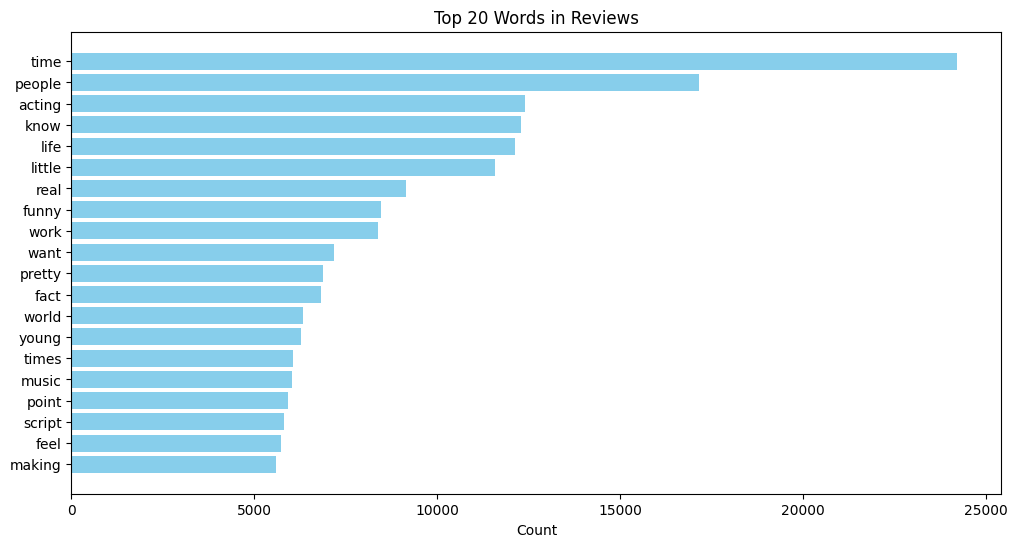

In [47]:
# Get the sum of each column for Bag of Words
sum_words = count_df.sum(axis=0)

# Create a DataFrame for the words and their corresponding counts
words_freq = pd.DataFrame(sum_words, columns=['count'])
words_freq['word'] = words_freq.index

# Sort the DataFrame based on the count
words_freq = words_freq.sort_values('count', ascending=False).head(20)

# Plotting the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(words_freq['word'], words_freq['count'], color='skyblue')
plt.xlabel('Count')
plt.title('Top 20 Words in Reviews')
plt.gca().invert_yaxis()  # Reverse the order
plt.show()

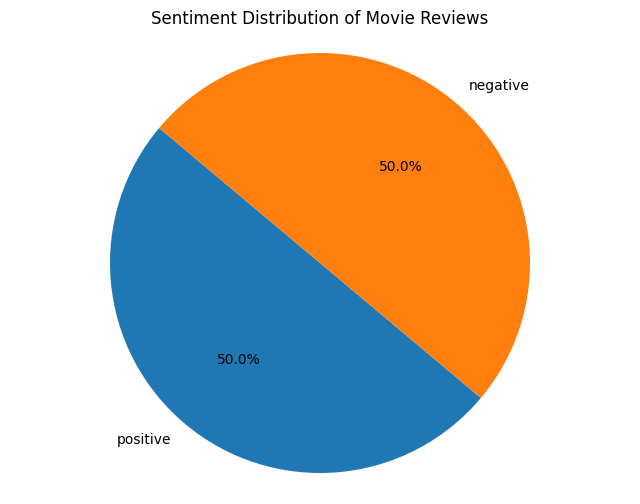

In [48]:
import matplotlib.pyplot as plt

# Assuming you have a sentiment column with values like 'Positive', 'Negative', 'Neutral'
sentiment_counts = movie_reviews_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Movie Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

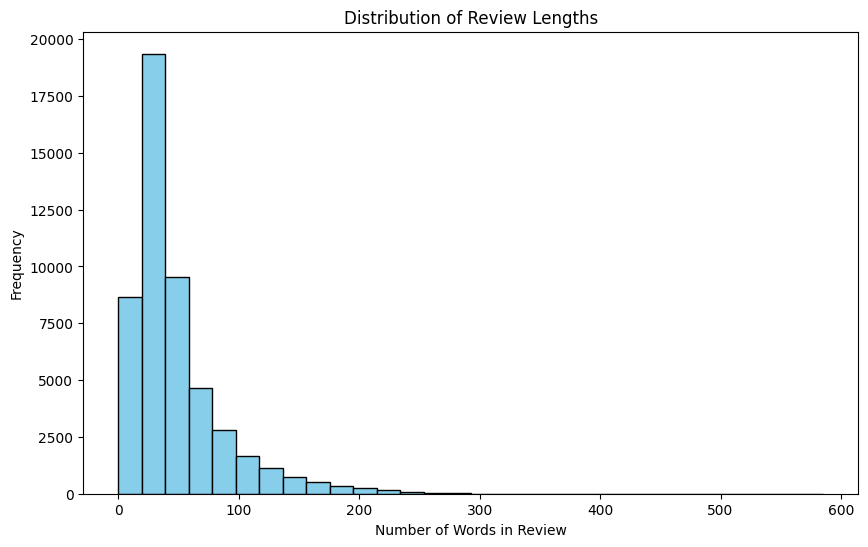

In [49]:
# Calculate the length of each review
movie_reviews_df['review_length'] = movie_reviews_df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(movie_reviews_df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()